# Analysis of the projected estimation

In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from finances.market import market_data as mkt_data

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Get real returns for two timeframes

In [27]:
mkt=mkt_data.MarketData()
short_rets = mkt.crypto_returns_data(
    symbols=['ADA', 'XMR', 'ADST', 'BTC', 'BIS', 'NEO', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP'],
    time_step='10T',
    start_date = datetime.datetime.today() - datetime.timedelta(days=8)
)

real_proj_rets = mkt.crypto_returns_data(
    symbols=['ADA', 'XMR', 'ADST', 'BTC', 'BIS', 'NEO', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP'],
    time_step='H',
    start_date = datetime.datetime.today() - datetime.timedelta(days=8)
)

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [28]:
short_rets.head()

,ADA,XMR,ADST,BTC,BIS,NEO,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP
2018-01-27 03:00:00,0.001183,-0.000224,-0.003582,0.001788,0.002599,0.002394,0.001813,0.002429,0.000543,-0.003999,0.001694,0.006352,0.002652,0.002789,0.002466
2018-01-27 03:10:00,-0.006863,-0.003759,0.000760,-0.001910,-0.007812,-0.003004,-0.006403,-0.003139,-0.009963,-0.002531,-0.004036,-0.006628,-0.010096,-0.007159,-0.001825
2018-01-27 03:20:00,-0.007331,-0.005375,0.004731,-0.001565,-0.003872,-0.005982,0.001620,-0.000700,0.004188,-0.003120,-0.001969,-0.004200,-0.001218,-0.006129,-0.000323
2018-01-27 03:30:00,-0.001478,-0.001934,0.006931,-0.001227,-0.001067,-0.002527,-0.010184,-0.000908,0.003258,0.000987,-0.000261,-0.002343,-0.002096,-0.002921,-0.002755
2018-01-27 03:40:00,0.000986,0.002579,0.003059,-0.000412,0.002826,0.002965,-0.001481,0.000493,0.011729,-0.000986,-0.000006,0.001106,0.008802,0.002405,0.002580


In [4]:
real_proj_rets.head()

,ADA,XMR,ADST,BTC,BIS,NEO,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP
2018-01-29,-0.038321,-0.027753,-0.025335,-0.027866,-0.070176,0.088148,-0.027591,0.004044,-0.058342,-0.005240,-0.018843,-0.047021,-0.018858,-0.044600,0.036535
2018-01-30,-0.089445,-0.073632,-0.072845,-0.053325,-0.169986,-0.007775,-0.103777,-0.048140,-0.081188,-0.017718,-0.050181,-0.093305,-0.094064,-0.104346,-0.075628
2018-01-31,-0.119881,-0.080165,-0.138109,-0.064740,-0.169838,-0.094446,-0.167293,-0.043088,-0.107594,-0.070621,-0.069500,-0.097767,-0.114848,-0.046511,-0.093886
2018-02-01,-0.075034,-0.055610,-0.195338,-0.047935,0.006593,-0.063475,-0.041306,0.002811,-0.050759,-0.088900,-0.060329,-0.048098,-0.056086,-0.047520,-0.063457
2018-02-02,-0.264389,-0.129022,-0.131151,-0.107814,-0.003748,-0.156135,-0.262162,-0.169984,-0.203601,-0.170184,-0.164027,-0.221855,-0.193534,-0.218228,-0.219993


## Analyse the distributions

We now plot the distribution of these random variables by defining its pdf and compare with the actual sample available.

In [35]:
proj_rets = pd.DataFrame()

n_steps = 6
x_max = 0.1
x = np.linspace(-x_max,x_max,100)

### Project using normal distribution properties

In this approach, we fit the returns to a normal distribution. Then, because a sum of N normal distributions is a normal distribution with

$$\mu_N = N \mu_0$$
$$\sigma_N = \sqrt{N} \sigma_0$$

We calculate the distribution for (daily) distribution of the $N$ (24) sums of short periods (hours), as a normal
$$N(N\mu_0, \sqrt{N}\sigma_0)$$.

Next is plotted the comparison between the:
* The PDF of the MLE normal distribution of the short period compared with the actual histogram of the actual data.

* Projected distribution for the returns in N steps later, obtained from the previously estimated normal, with the histogram of the actual data.

ADA -0.00178354871156 0.0269227665903
XMR -0.0012899216974 0.0177520582975
ADST -0.00246967401145 0.0254386324846
BTC -0.00101270351388 0.0114073570206
BIS -0.00155497575308 0.0373173272311
NEO -0.000265560622843 0.0233852221513
EMC2 -0.00174659628612 0.0315270009183
ETH -0.000315804938004 0.0172014210428
FUN -0.00216472013192 0.0257602128941
IOTA -0.00103656690519 0.0218941950351
LTC -0.000927224412875 0.0192750303824
TRX -0.00171708468706 0.0250404853043
UBQ -0.00115914596765 0.0270656468141
XLM -0.00181392943817 0.0278612426425
XRP -0.0010623385033 0.0264595539125


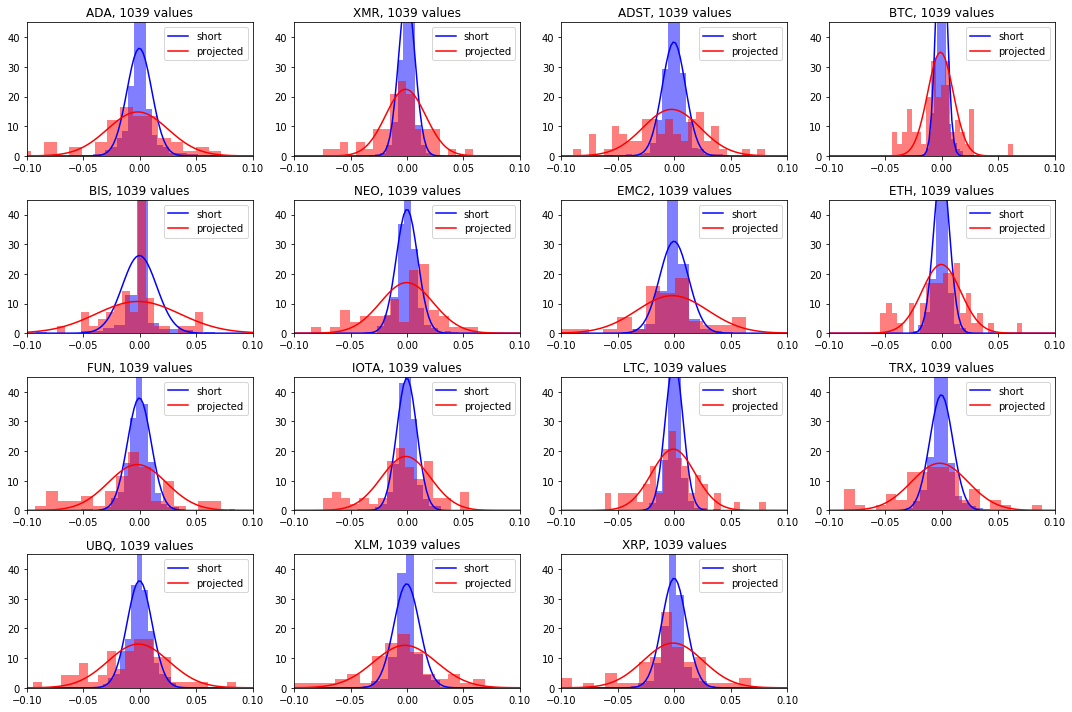

In [36]:
fig = plt.figure(figsize=(15,10))
f = 1
for r in short_rets.columns:
    rets = short_rets[r].dropna()
    # MLE returns to a normal distribution
    short_mu, short_std = norm.fit(rets)
    # project to the normal of sum of n_steps
    proj_mu, proj_std = n_steps*short_mu, short_std*np.sqrt(n_steps)

    print(r, proj_mu, proj_std)
    # get the two pdf
    p_short = norm.pdf(x, short_mu, short_std)
    p_proj = norm.pdf(x, proj_mu, proj_std)
    
    fig.add_subplot(4,4,f)
    ax = plt.gca()
    plt.plot(x, p_short, 'b', label='short')
    plt.plot(x, p_proj, 'r', label='projected')
    plt.hist(short_rets[r], color='b', bins=25, normed=True, alpha=0.5)
    plt.hist(real_proj_rets[r], color='r', bins=25, normed=True, alpha=0.5)

    f+=1
    ax.set_title('{}, {} values'.format(r, len(rets)))
    ax.set_ylim(0,45)
    ax.set_xlim(-x_max,x_max)
    plt.legend()
plt.tight_layout()

### With actual KDE estimation

In this approach, we use the KDE estimator to estimate the distribution of the data.

However, because we dont know which is the distribution and it is a purely numerical functions, we estimate the projected distribution by doing the following steps:
1) Estimate the original short period distribution using KDE, given by $X$.

2) Generate N random samples with the probability distribution obtain in the KDE

3) Sum those N samples to get the sample of $\sum_i X_i$. This sample is very close to a normal, given the central limit theorem.

4) Fit this sample to a normal distribution using MLE

In [37]:
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs

In [38]:
def projected_sample(short_period_sample, n_steps):
    kde = sm.nonparametric.KDEUnivariate(short_period_sample)
    
    # do the kde esimation
    kde.fit()
    
    # adapt sample to discrete variable
    x = kde.support
    pdf = kde.density
    sum(pdf)/(len(pdf)-1)
    prob = pdf*(x[-1]-x[0])/(len(pdf)-1)
    prob[prob < 0] = 0
    
    # generate a sample with the previous distribution
    sample0 = np.random.choice(kde.support, p=prob, size=100000)
    
    # sum that sample N times
    sample = sample0.copy()
    for k in range(n_steps):
        sample += np.random.choice(kde.support, p=prob, size=100000)
    return sample

ADA -0.00208927285255 0.0295401811221
XMR -0.00151570428188 0.0193971071922
ADST -0.00295008109047 0.0279889596955
BTC -0.0011114918683 0.0125446000313
BIS -0.00174241392075 0.0404226274483
NEO -1.14854226584e-05 0.0257582074254
EMC2 -0.00176701847829 0.0343191329771
ETH -0.000351419505854 0.0187131865609
FUN -0.00257789285084 0.0283078711153
IOTA -0.00125054916456 0.0238349978746
LTC -0.0010727646612 0.0211653484218
TRX -0.00197343370834 0.0272496423246
UBQ -0.00147748232944 0.0298426719807
XLM -0.00205261122962 0.0303527467105
XRP -0.00131894783086 0.0288125709213


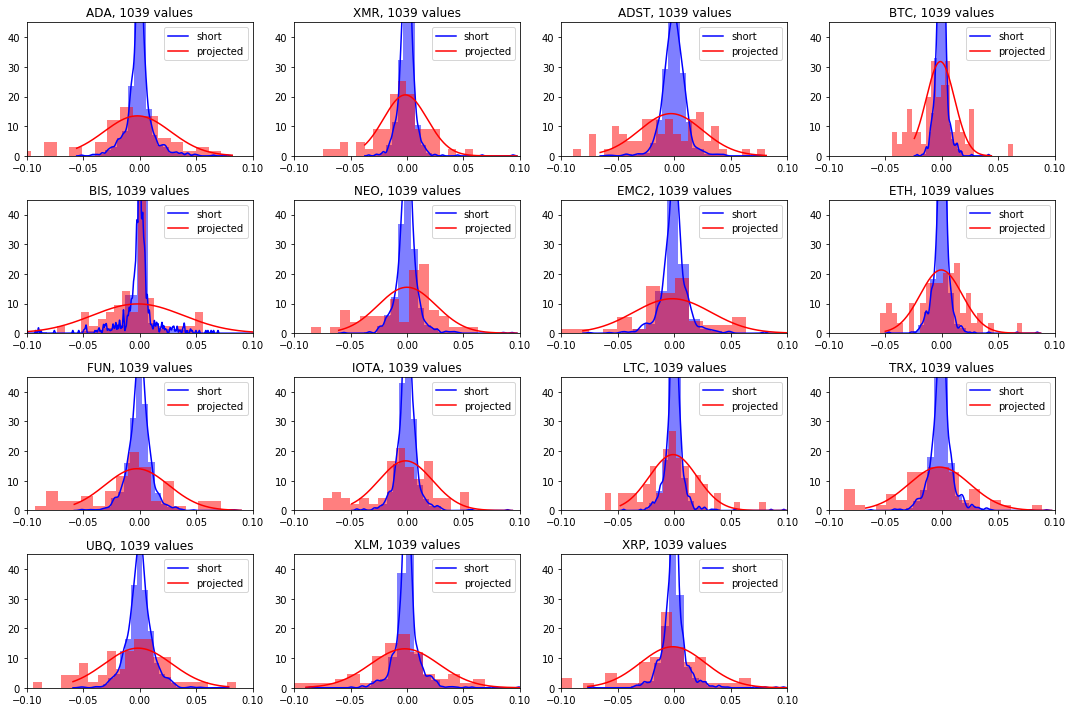

In [39]:
fig = plt.figure(figsize=(15,10))
f = 1
for r in short_rets.columns:
    rets = short_rets[r].dropna()
    # KDE
    kde = sm.nonparametric.KDEUnivariate(rets)
    kde.fit()
    x = kde.support
    
    # get projected sample
    proj_rets = projected_sample(rets, n_steps)
    # fit it to a normal distribution
    proj_mu, proj_std = norm.fit(proj_rets)
    print(r, proj_mu, proj_std)
    
    # get the two pdf
    p_short = kde.density
    p_proj = norm.pdf(x, proj_mu, proj_std)
    
    fig.add_subplot(4,4,f)
    ax = plt.gca()
    plt.plot(x, p_short, 'b', label='short')
    plt.plot(x, p_proj, 'r', label='projected')
    plt.hist(short_rets[r], color='b', bins=25, normed=True, alpha=0.5)
    plt.hist(real_proj_rets[r], color='r', bins=25, normed=True, alpha=0.5)

    f+=1
    ax.set_title('{}, {} values'.format(r, len(rets)))
    ax.set_ylim(0,45)
    ax.set_xlim(-x_max,x_max)
    plt.legend()
plt.tight_layout()

### Comparison of the two methods

ADA -0.00178354871156 0.0269227665903
ADA -0.00203196763486 0.0292589503654
XMR -0.0012899216974 0.0177520582975
XMR -0.00156910499975 0.0194201407723
ADST -0.00246967401145 0.0254386324846
ADST -0.00292395189115 0.0280201569386
BTC -0.00101270351388 0.0114073570206
BTC -0.0011545851636 0.0125329406141
BIS -0.00155497575308 0.0373173272311
BIS -0.00177735805965 0.0402611191477
NEO -0.000265560622843 0.0233852221513
NEO -0.00046475429129 0.0255500878104
EMC2 -0.00174659628612 0.0315270009183
EMC2 -0.00215583726279 0.0344742387338
ETH -0.000315804938004 0.0172014210428
ETH -0.000380701134951 0.0187804928841
FUN -0.00216472013192 0.0257602128941
FUN -0.00256255497201 0.0283750877323
IOTA -0.00103656690519 0.0218941950351
IOTA -0.00119298850151 0.024027307463
LTC -0.000927224412875 0.0192750303824
LTC -0.00106690545834 0.0209540059086
TRX -0.00171708468706 0.0250404853043
TRX -0.00205035274381 0.0272908317181
UBQ -0.00115914596765 0.0270656468141
UBQ -0.00146828306166 0.0297592321113
XLM -

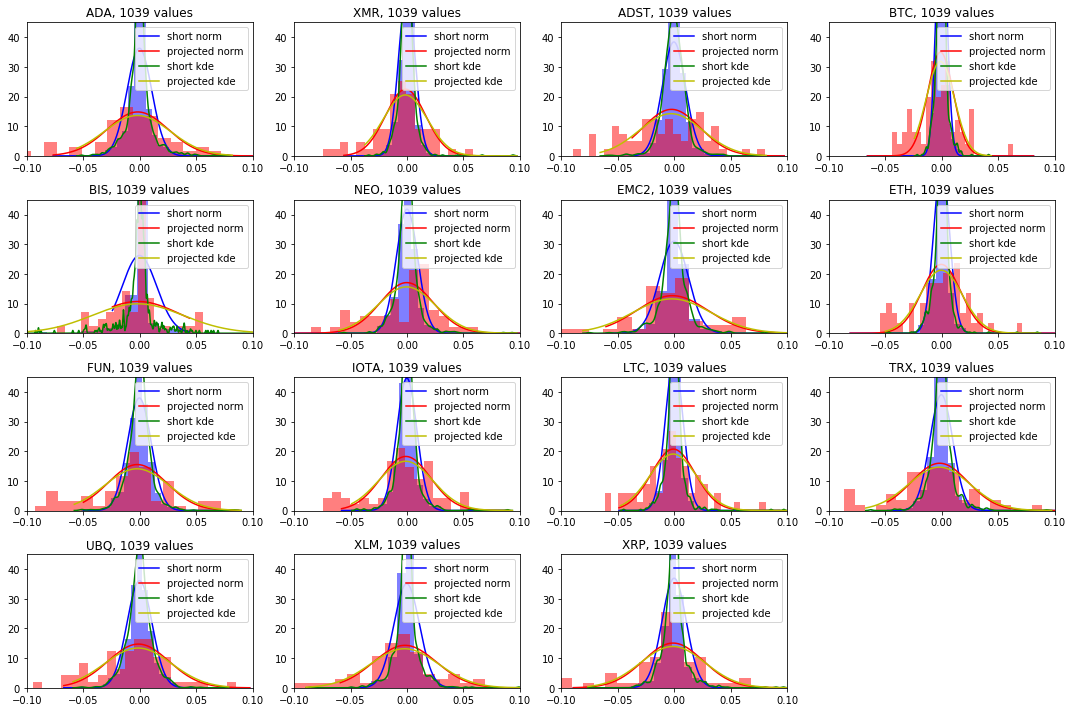

In [40]:
fig = plt.figure(figsize=(15,10))
f = 1
for r in short_rets.columns:
    rets = short_rets[r].dropna()
    # MLE returns to a normal distribution
    short_mu, short_std = norm.fit(rets)
    # project to the normal of sum of n_steps
    proj_mu, proj_std = n_steps*short_mu, short_std*np.sqrt(n_steps)

    print(r, proj_mu, proj_std)
    # get the two pdf
    p_short = norm.pdf(x, short_mu, short_std)
    p_proj = norm.pdf(x, proj_mu, proj_std)
    
    fig.add_subplot(4,4,f)
    ax = plt.gca()
    plt.plot(x, p_short, 'b', label='short norm')
    plt.plot(x, p_proj, 'r', label='projected norm')

    rets = short_rets[r].dropna()
    # KDE
    kde = sm.nonparametric.KDEUnivariate(rets)
    kde.fit()
    x = kde.support
    
    # get projected sample
    proj_rets = projected_sample(rets, n_steps)
    # fit it to a normal distribution
    proj_mu, proj_std = norm.fit(proj_rets)
    print(r, proj_mu, proj_std)
    
    # get the two pdf
    p_short = kde.density
    p_proj = norm.pdf(x, proj_mu, proj_std)
    

    plt.plot(x, p_short, 'g', label='short kde')
    plt.plot(x, p_proj, 'y', label='projected kde')
    plt.hist(short_rets[r], color='b', bins=25, normed=True, alpha=0.5)
    plt.hist(real_proj_rets[r], color='r', bins=25, normed=True, alpha=0.5)

    f+=1
    ax.set_title('{}, {} values'.format(r, len(rets)))
    ax.set_ylim(0,45)
    ax.set_xlim(-x_max,x_max)
    plt.legend()
plt.tight_layout()
plt.tight_layout()

## First conclusion

Two methods have roughly the same projected normal distribution. Therefore, the best one is using normal fit for the initial and the projected distributions because of speed issues.